In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

total_medals = pd.read_csv('medals_total.csv')

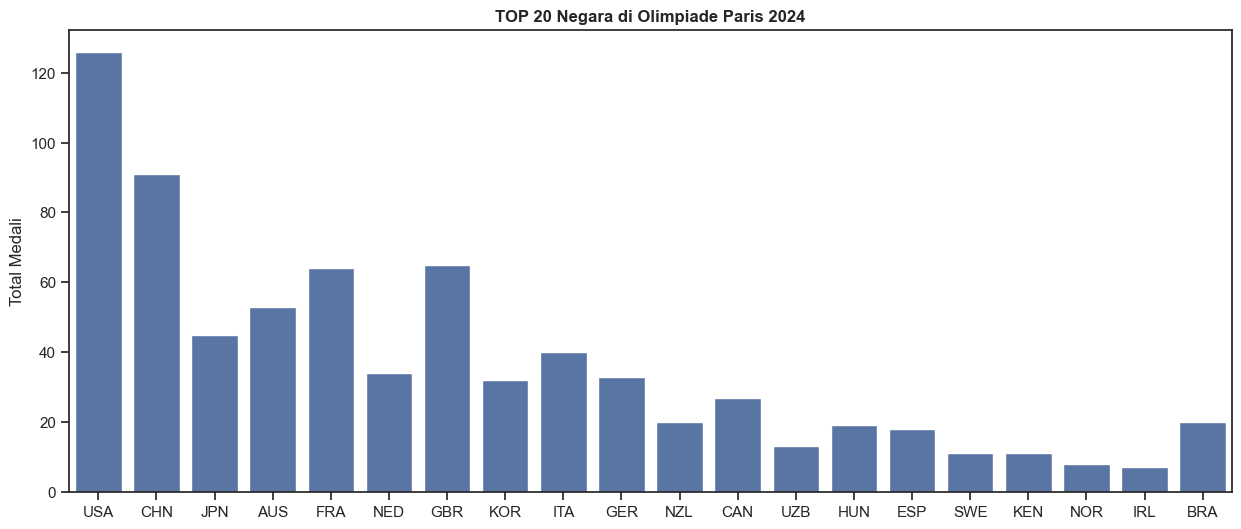

In [131]:
rank_total = total_medals[['country_code','Total']].head(20).set_index('country_code')
plt.figure(figsize=(15,6))
sns.set_theme(style='ticks')
sns.barplot(rank_total, x='country_code', y='Total')
plt.ylabel('Total Medali')
plt.xlabel('')
plt.title('TOP 20 Negara di Olimpiade Paris 2024', fontweight='bold')
plt.show()

#### Berdasarkan perolehan Medali Emas

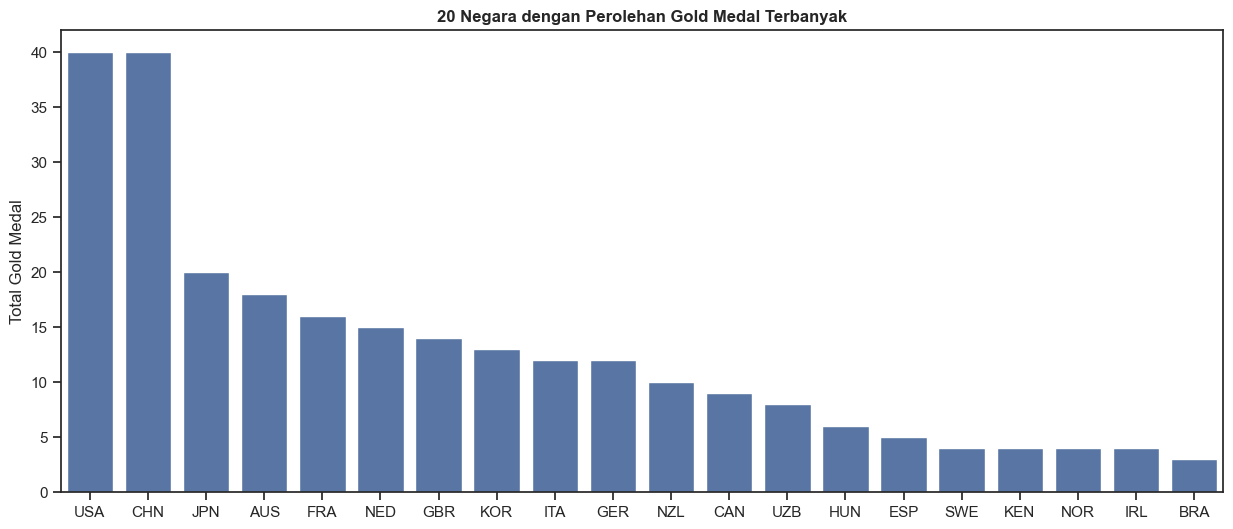

In [132]:
rank_by_gold = total_medals[['country_code','Gold Medal']].head(20)
plt.figure(figsize=(15,6))
sns.barplot(rank_by_gold, x='country_code', y='Gold Medal')
plt.xlabel('')
plt.ylabel('Total Gold Medal')
plt.title('20 Negara dengan Perolehan Gold Medal Terbanyak', fontweight='bold')
plt.show()

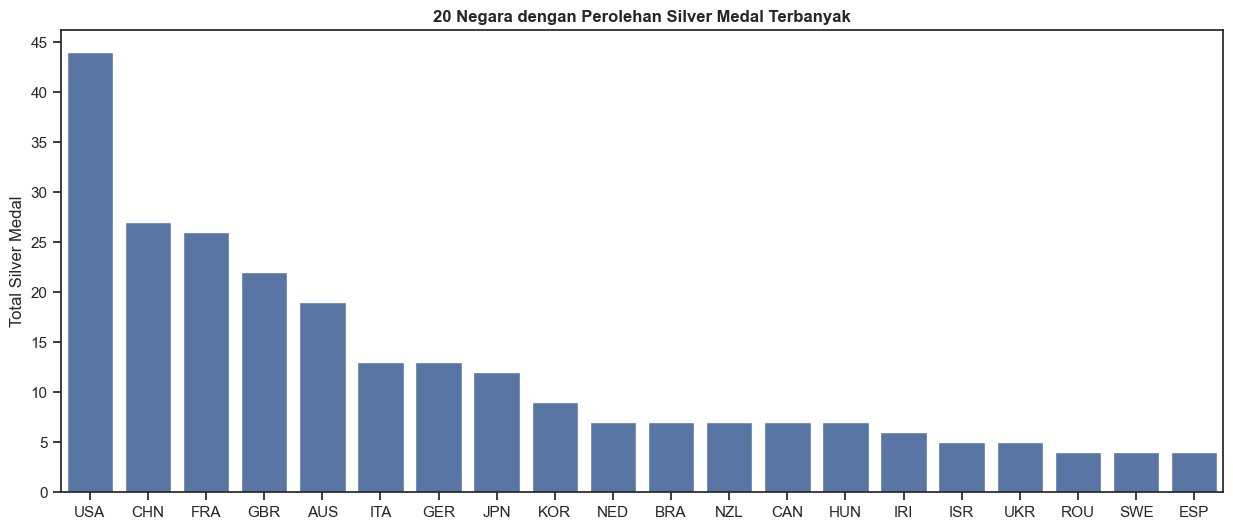

In [133]:
rank_by_silver = total_medals[['country_code', 'Silver Medal']].sort_values(by='Silver Medal', ascending=False).head(20)
plt.figure(figsize=(15,6))
sns.barplot(rank_by_silver, x='country_code', y='Silver Medal')
plt.xlabel('')
plt.ylabel('Total Silver Medal')
plt.title('20 Negara dengan Perolehan Silver Medal Terbanyak', fontweight='bold')
plt.yticks(range(0,46,5))
plt.show()

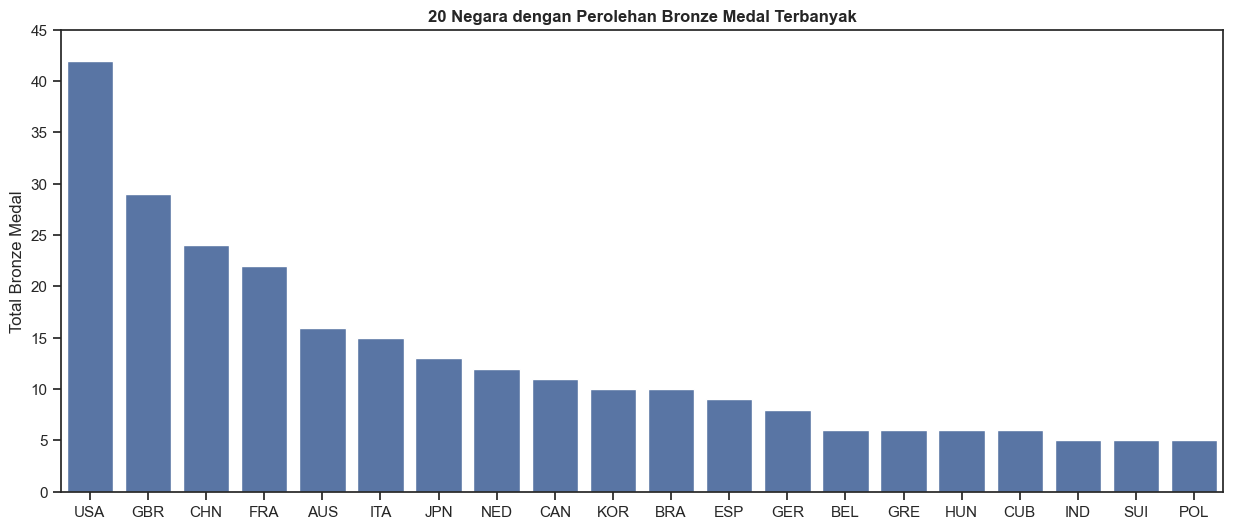

In [134]:
rank_by_bronze = total_medals[['country_code', 'Bronze Medal']].sort_values(by='Bronze Medal', ascending=False).head(20)
plt.figure(figsize=(15,6))
sns.barplot(rank_by_bronze, x='country_code', y='Bronze Medal')
plt.xlabel('')
plt.ylabel('Total Bronze Medal')
plt.title('20 Negara dengan Perolehan Bronze Medal Terbanyak', fontweight='bold')
plt.yticks(range(0,46,5))
plt.show()

### Total Atheletes

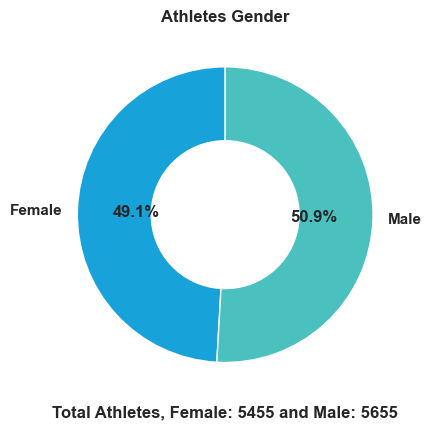

In [135]:
athlets = pd.read_csv('athletes.csv')
female = athlets[athlets['gender']=='Female'].shape[0]
male = athlets[athlets['gender']=='Male'].shape[0]
athlets_gender = athlets.groupby('gender')['name'].size()
athlets_gender.plot(kind='pie', colors=['#18a2da', '#4bc1bf'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5), textprops={'fontweight':'bold'})
plt.ylabel('')
plt.xlabel(f'Total Athletes, Female: {female} and Male: {male}', fontweight='bold', ha='center')
plt.title('Athletes Gender', fontweight='bold')
plt.show()

#### Rata-rata Umur Atlit berdasarkan gender

In [136]:
athlets['birth_date'] = pd.to_datetime(athlets['birth_date'])
athlets['Year'] = athlets['birth_date'].dt.year
current_year = pd.Timestamp.now().year
athlets['Year'] = current_year - athlets['Year']
athlets.groupby('gender')['Year'].median()

gender
Female    26.0
Male      27.0
Name: Year, dtype: float64

#### Total Athletes

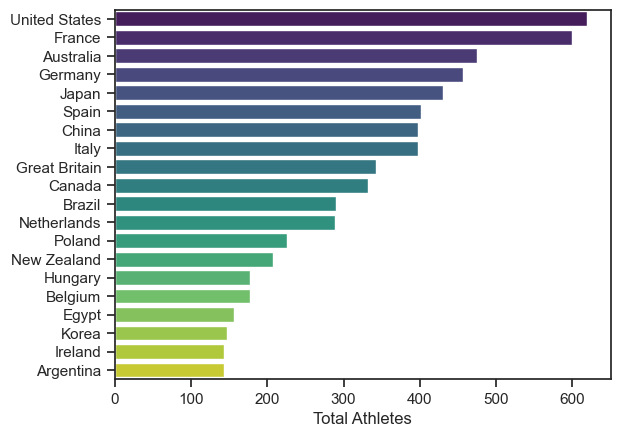

In [137]:
total_athletes = athlets.groupby('country')['name'].count().sort_values(ascending=False).head(20)
total_athletes_df = total_athletes.reset_index()
sns.barplot(data=total_athletes_df, x='name', y='country', hue='country', palette='viridis')
plt.ylabel('')
plt.xlabel('Total Athletes')
plt.show()

### Avg height athletes by gender

In [140]:
height_avg = athlets.copy()
height_avg['height'] = height_avg['height'].replace(0, np.nan)
height_avg.dropna(subset='height', inplace=True)

In [ ]:
height_data = height_avg.groupby('gender')['height'].mean()
height_data.astype('int32')

gender
Female    172
Male      185
Name: height, dtype: int32

## SPORTS

In [ ]:
events = pd.read_csv('events.csv')
events[['event','sport']]

,event,sport
0,Men's Individual,Archery
1,Women's Individual,Archery
2,Men's Team,Archery
3,Women's Team,Archery
4,Mixed Team,Archery
...,...,...
324,Men's Freestyle 65kg,Wrestling
325,Men's Freestyle 74kg,Wrestling
326,Men's Freestyle 86kg,Wrestling
327,Men's Freestyle 97kg,Wrestling


In [ ]:
sport = events.groupby('sport').size()
sport.index

Index(['Archery', 'Artistic Gymnastics', 'Artistic Swimming', 'Athletics',
       'Badminton', 'Basketball', 'Basketball 3x3', 'Beach Volleyball',
       'Boxing', 'Breaking', 'Canoe Slalom', 'Canoe Sprint',
       'Cycling BMX Freestyle', 'Cycling BMX Racing', 'Cycling Mountain Bike',
       'Cycling Road', 'Cycling Track ', 'Diving', 'Equestrian', 'Fencing',
       'Football', 'Golf', 'Handball', 'Hockey', 'Judo', 'Marathon Swimming',
       'Modern Pentathlon', 'Rhythmic Gymnastics', 'Rowing', 'Rugby Sevens',
       'Sailing', 'Shooting', 'Skateboarding', 'Sport Climbing', 'Surfing',
       'Swimming', 'Table Tennis', 'Taekwondo', 'Tennis', 'Trampoline',
       'Triathlon', 'Volleyball', 'Water Polo', 'Weightlifting', 'Wrestling'],
      dtype='object', name='sport')

## Total Medals

In [ ]:
medalists = pd.read_csv('medallists.csv')
medalists.groupby('medal_type')['name'].count()

medal_type
Bronze Medal    804
Gold Medal      748
Silver Medal    754
Name: name, dtype: int64

#### Gold Medal by gender

In [ ]:
gold_medal = medalists[medalists['medal_type']=='Gold Medal']
gender_gold = gold_medal.groupby('gender').size()
gender_gold

gender
Female    376
Male      372
dtype: int64

#### Silver Medal by gender

In [ ]:
silver_medal = medalists[medalists['medal_type']=='Silver Medal']
gender_silver = silver_medal.groupby('gender').size()
gender_silver

gender
Female    380
Male      374
dtype: int64

#### Bronze Medal by gender

In [ ]:
bronze_medal = medalists[medalists['medal_type']=='Bronze Medal']
gender_bronze = bronze_medal.groupby('gender').size()
gender_bronze

gender
Female    402
Male      402
dtype: int64

### Total perolehan Medali by Gender

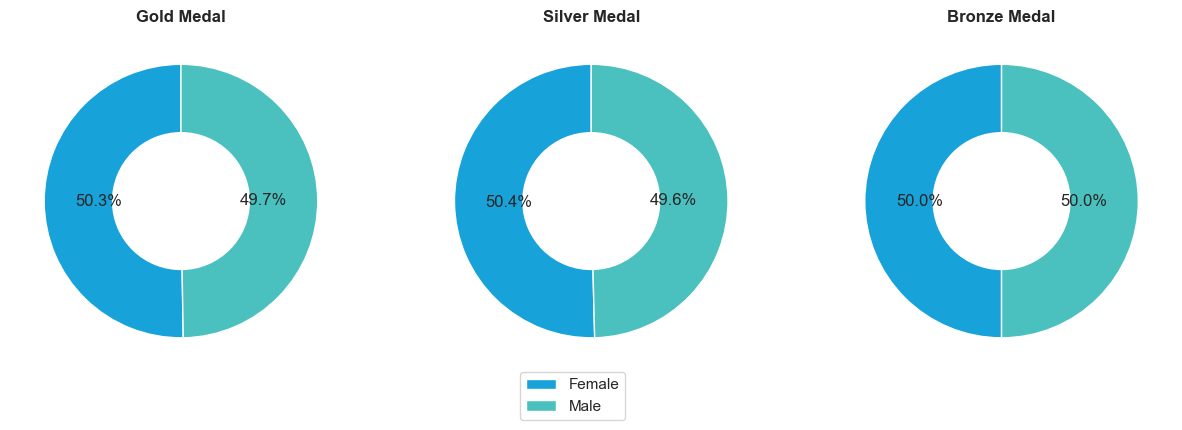

In [ ]:
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(1,3, figsize=(15,10))
ax[0].pie(gender_gold, autopct='%1.1f%%', wedgeprops=dict(width=0.5),startangle=90, colors=['#18a2da', '#4bc1bf'])
ax[0].set_title('Gold Medal', fontweight='bold')

ax[1].pie(gender_silver, autopct='%1.1f%%', wedgeprops=dict(width=0.5),startangle=90, colors=['#18a2da', '#4bc1bf'])
ax[1].set_title('Silver Medal',fontweight='bold')

ax[2].pie(gender_bronze, autopct='%1.1f%%', wedgeprops=dict(width=0.5),startangle=90, colors=['#18a2da', '#4bc1bf'])
ax[2].set_title('Bronze Medal',fontweight='bold')

fig.legend(labels=['Female','Male'], loc='center',bbox_to_anchor=(0.5, 0.3))
plt.show()

### Perolehan Medali berdasarkan Usia

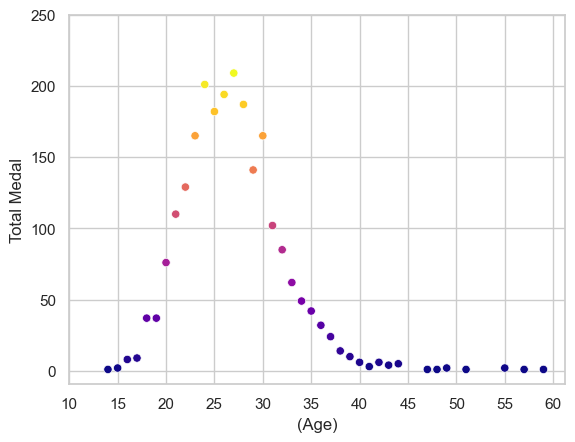

In [ ]:
medalists['birth_date'] = pd.to_datetime(medalists['birth_date'])
medalists['birth_year'] = medalists['birth_date'].dt.year
now = pd.Timestamp.now().year
medalists['Age'] = now - medalists['birth_year']
age = medalists[['Age','medal_type']]
age1 = age.groupby('Age')['medal_type'].size().reset_index(name='medal')

sns.set_theme(style='whitegrid')
sns.scatterplot(data=age1, x='Age', y='medal',hue='medal', palette='plasma', legend=False)
plt.xticks(range(10,61,5))
plt.yticks(range(0,251,50))
plt.ylabel('Total Medal')
plt.xlabel('(Age)')
plt.show()